# week 10: correlation, redundancy, and heterogeneity

## 2022.march.23 | eeb125 
## prof. caroline fukuchi

In [98]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

## do large mammals spend longer in utero than small mammals?

In [99]:
plt.style.use('dark_background')

In [100]:
pantheria= pd.read_csv("pantheria.txt",sep="\t")

In [101]:
important_columns = ["MSW05_Order","MSW05_Binomial","5-1_AdultBodyMass_g","23-1_SexualMaturityAge_d",'17-1_MaxLongevity_m','25-1_WeaningAge_d','9-1_GestationLen_d']

sub_pantheria = pantheria[important_columns]
sub_pantheria.head()

,MSW05_Order,MSW05_Binomial,5-1_AdultBodyMass_g,23-1_SexualMaturityAge_d,17-1_MaxLongevity_m,25-1_WeaningAge_d,9-1_GestationLen_d
0,Artiodactyla,Camelus dromedarius,492714.47,1947.94,480.0,389.38,386.51
1,Carnivora,Canis adustus,10392.49,249.88,137.0,52.89,65.00
2,Carnivora,Canis aureus,9658.70,371.23,192.0,61.30,61.24
3,Carnivora,Canis latrans,11989.10,372.90,262.0,43.71,61.74
4,Carnivora,Canis lupus,31756.51,679.37,354.0,44.82,63.50


In [102]:
# rename columns so they are more human-friendly

columnnames = {'MSW05_Order': 'order',
               'MSW05_Binomial': 'genus_species',
               '5-1_AdultBodyMass_g': 'bodymass',
               '23-1_SexualMaturityAge_d': 'maturity',
               '17-1_MaxLongevity_m': 'longevity',
               '25-1_WeaningAge_d':"weaning",
               '9-1_GestationLen_d':"gestation"}

rn_pantheria = sub_pantheria.rename(columns=columnnames)

In [103]:
rn_pantheria.head()

,order,genus_species,bodymass,maturity,longevity,weaning,gestation
0,Artiodactyla,Camelus dromedarius,492714.47,1947.94,480.0,389.38,386.51
1,Carnivora,Canis adustus,10392.49,249.88,137.0,52.89,65.00
2,Carnivora,Canis aureus,9658.70,371.23,192.0,61.30,61.24
3,Carnivora,Canis latrans,11989.10,372.90,262.0,43.71,61.74
4,Carnivora,Canis lupus,31756.51,679.37,354.0,44.82,63.50


In [104]:
# it will make our lives easier to just drop missing values now

rn_pantheria = rn_pantheria.dropna()

# log-transform our values

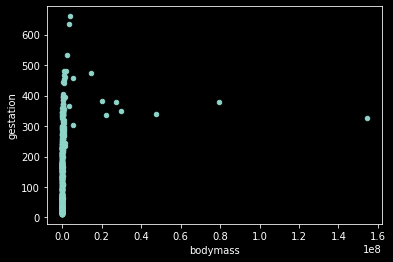

In [105]:
rn_pantheria.plot.scatter(x = 'bodymass', y = 'gestation');

## let's check the variables by themselves

# body mass

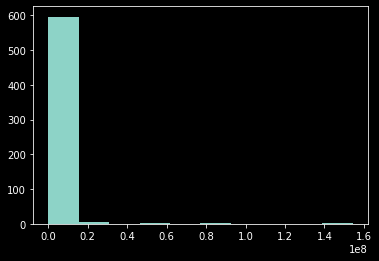

In [106]:
plt.hist(rn_pantheria["bodymass"])
plt.show()

# gestation

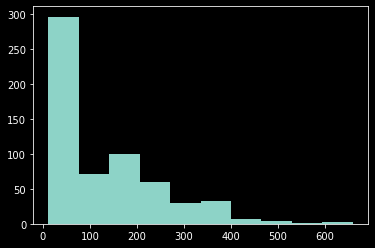

In [107]:
plt.hist(rn_pantheria["gestation"])
plt.show()

# log-transform our values to squish them together

In [108]:
np.log(2000)

7.600902459542082

# log-transform our values to squish them together

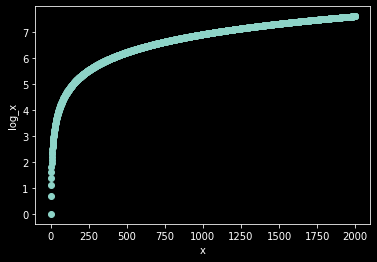

In [109]:
vals = range(2000)[1:]
log_vals = np.log(vals)
plt.scatter(vals,log_vals)
plt.xlabel("x")
plt.ylabel("log_x")
plt.show()

# body mass

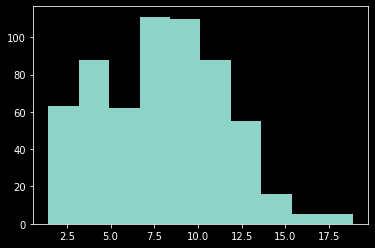

In [110]:
plt.hist(np.log(rn_pantheria["bodymass"]))
plt.show()

# gestation

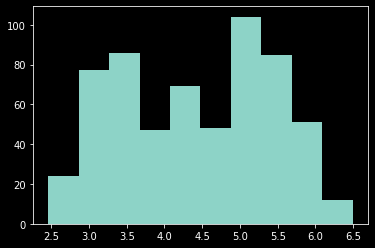

In [111]:
plt.hist(np.log(rn_pantheria["gestation"]))
plt.show()

In [112]:
panthdat_trans = rn_pantheria.copy()
panthdat_trans.head()

,order,genus_species,bodymass,maturity,longevity,weaning,gestation
0,Artiodactyla,Camelus dromedarius,492714.47,1947.94,480.0,389.38,386.51
1,Carnivora,Canis adustus,10392.49,249.88,137.0,52.89,65.00
2,Carnivora,Canis aureus,9658.70,371.23,192.0,61.30,61.24
3,Carnivora,Canis latrans,11989.10,372.90,262.0,43.71,61.74
4,Carnivora,Canis lupus,31756.51,679.37,354.0,44.82,63.50


In [113]:
panthdat_trans[['bodymass', 'longevity', 'gestation','weaning','maturity']] = (panthdat_trans[['bodymass', 'longevity', 'gestation','weaning','maturity']].
                                                          apply(np.log))

# this looks a bit better behaved

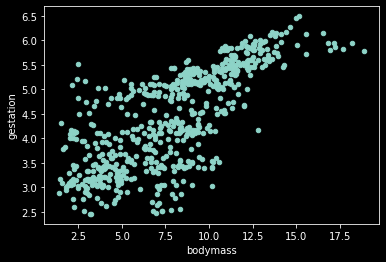

In [114]:
panthdat_trans.plot.scatter(x = 'bodymass', y = 'gestation');

# fit our regression

In [115]:
from statsmodels.formula.api import ols

In [116]:
regmod = ols('gestation ~ bodymass', data = panthdat_trans) # setup the model
regmod_fit = regmod.fit() # estimate/fit the model 
regmod_fit.params # get parameter estimates

Intercept    2.736231
bodymass     0.212745
dtype: float64

# visualize our regression

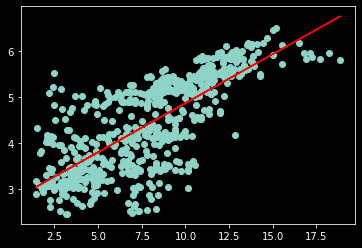

In [117]:
line = regmod_fit.fittedvalues
plt.plot( panthdat_trans['bodymass'], panthdat_trans['gestation'],marker="o",linestyle="")
plt.plot(panthdat_trans['bodymass'], line, color = "red")

# visualize our regression

R-squared: 0.5510838361086261


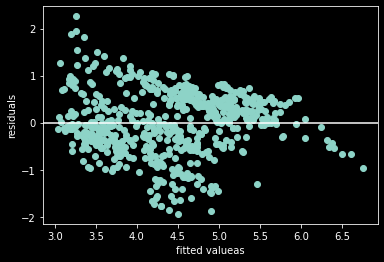

In [118]:
plt.scatter(regmod_fit.fittedvalues, regmod_fit.resid)
plt.axhline(y = 0)
plt.xlabel('fitted valueas')
plt.ylabel('residuals')
print("R-squared:",regmod_fit.rsquared)

# residuals

- measure the distance from each observed value from the fitted line

![](images/resid.png)

# visualize our regression

- we can check to see if our residuals are well-behaved

(array([ 13.,  27.,  44., 121., 135., 153.,  83.,  20.,   4.,   3.]),
 array([-1.93975582, -1.51970275, -1.09964968, -0.67959661, -0.25954353,
         0.16050954,  0.58056261,  1.00061568,  1.42066875,  1.84072182,
         2.26077489]),
 <BarContainer object of 10 artists>)

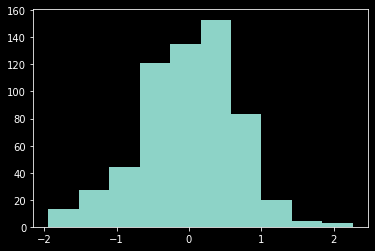

In [119]:
plt.hist(regmod_fit.resid)

# we have a good sense that body mass and gestation time are related
  - organisms that are larger also tend to spend a longer time in utero
  - many timing variables vary according to body mass-- larger bodies mean more time is needed to develop/grow
  

# related q: which groups have larger _relative_ gestation times
  - what if we want to know whether organisms spend a long time in utero _given their body size_?

<AxesSubplot:xlabel='order'>

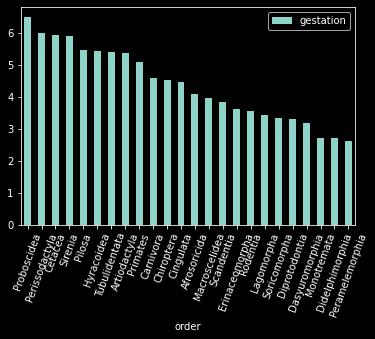

In [120]:
gest = panthdat_trans[['order','gestation']]
gest_ord = gest.groupby('order')
gest_ord_means = gest_ord.mean().sort_values(by="gestation",ascending=False)

gest_ord_means.plot.bar(rot=70)

<AxesSubplot:xlabel='order'>

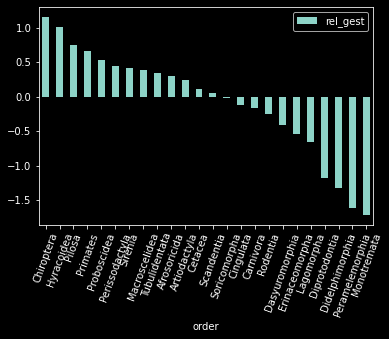

In [121]:
rel_gest = regmod_fit.resid
rel_gest = pd.DataFrame({'order':gest['order'],'rel_gest':rel_gest})
rel_gest_ord = rel_gest.groupby('order')
rel_gest_ord_means = rel_gest_ord.mean().sort_values(by="rel_gest",ascending=False)

rel_gest_ord_means.plot.bar(rot=70)

In [122]:
rel_gest = regmod_fit.resid
rel_gest = pd.DataFrame({'genus_species':panthdat_trans['genus_species'],'rel_gest':rel_gest})
rel_gest.loc[(rel_gest['genus_species']=="Eschrichtius robustus") | (rel_gest['genus_species']=="Felis silvestris") | (rel_gest['genus_species']=="Homo sapiens")]

,genus_species,rel_gest
1372,Eschrichtius robustus,-0.439206
1441,Felis silvestris,-0.347332
1689,Homo sapiens,0.544342


# what about the other measurements?
  - we already know from last week that body mass and longevity are correlated
  - lets see what is the relationship between body mass and maturation time

# fit our regression

In [123]:
regmod = ols('maturity ~ bodymass', data = panthdat_trans) # setup the model
regmod_fit = regmod.fit() # estimate/fit the model 
print(regmod_fit.params) # get parameter estimates
print("\nrsquared:",regmod_fit.rsquared)

Intercept    4.429816
bodymass     0.222264
dtype: float64

rsquared: 0.5143670148040211


# visualize our regression

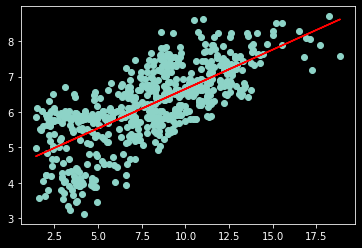

In [124]:
line = regmod_fit.fittedvalues
plt.plot( panthdat_trans['bodymass'], panthdat_trans['maturity'],marker="o",linestyle="")
plt.plot(panthdat_trans['bodymass'], line, color = "red")

In [125]:
rel_mat = regmod_fit.resid
rel_mat = pd.DataFrame({'genus_species':panthdat_trans['genus_species'],'rel_mat':rel_mat})
rel_mat.loc[(rel_mat['genus_species']=="Eschrichtius robustus") | (rel_mat['genus_species']=="Felis silvestris") | (rel_mat['genus_species']=="Homo sapiens")]

,genus_species,rel_mat
1372,Eschrichtius robustus,-0.168169
1441,Felis silvestris,-0.442945
1689,Homo sapiens,1.757752


# multidimensionality

  - we may want to understand the 'correlation structure' between several variables
  - we could do multiple regression, but that comes with caveats
    - also hard to visualize -- how do we plot 6 dimensions?


## principal components analysis

- pca is a common way to deal with multidimensionality
- take a dataset containing many dimensions and reduce them to only a few 


## pca and correlated information

- multidimensional datasets contain a lot of redundant information 
  + many variables are _correlated_ 
  + knowing one variable tells you what to expect about a second variable  

![alt text](images/correlation.png "correlation")


### if a mammal has a body size of 1000 kg, can you make a guess about the length of its gestation period?


# PCA
  
  - there is some "redundancy" in correlated measurements
  - PCA uses matrix math (which we will not touch) to identify this redundancy


# PCA

  - _input_: a set of **X** measurements
  - _output_: a set of **X** transformed measurements that are uncorrelated
  - each new measurement captures information from several of the original measurements
  - we call these new measurements **principal components**, or **PCs**



In [126]:
panthdat_trans

,order,genus_species,bodymass,maturity,longevity,weaning,gestation
0,Artiodactyla,Camelus dromedarius,13.107685,7.574528,6.173786,5.964556,5.957158
1,Carnivora,Canis adustus,9.248839,5.520981,4.919981,3.968214,4.174387
2,Carnivora,Canis aureus,9.175614,5.916822,5.257495,4.115780,4.114801
3,Carnivora,Canis latrans,9.391753,5.921310,5.568345,3.777577,4.122932
4,Carnivora,Canis lupus,10.365853,6.521166,5.869297,3.802654,4.151040
...,...,...,...,...,...,...,...
5383,Diprotodontia,Wallabia bicolor,9.615802,6.195874,5.192957,6.103565,3.580180
5391,Rodentia,Xerus inauris,6.350187,5.851628,5.049856,3.948355,3.856299
5394,Cingulata,Zaedyus pichiy,7.275698,5.714689,4.682131,3.734808,4.115290
5398,Carnivora,Zalophus californianus,11.829158,7.612609,5.886104,5.765222,5.857905


In [127]:
# we need to extract just the measurements -- do away temporarily with the species and order labels

traits=panthdat_trans.loc[:,panthdat_trans.columns[2:]].values 
traits

array([[13.10768512,  7.57452768,  6.1737861 ,  5.96455573,  5.95715774],
       [ 9.24883871,  5.5209808 ,  4.91998093,  3.96821429,  4.17438727],
       [ 9.17561434,  5.91682182,  5.25749537,  4.11577984,  4.11480057],
       ...,
       [ 7.2756985 ,  5.71468944,  4.68213123,  3.73480839,  4.11529033],
       [11.82915753,  7.61260867,  5.88610403,  5.76522245,  5.85790458],
       [ 2.91397977,  4.12503541,  4.09434456,  3.21887582,  2.90361698]])

In [128]:
# it is typically good practice to transform our data
# CPF: explain this verbally

traits_scaled=pd.DataFrame(StandardScaler().fit_transform(traits))

unscaled mean:  6.185340932975554
unscaled st_dev:  1.0796019943213697


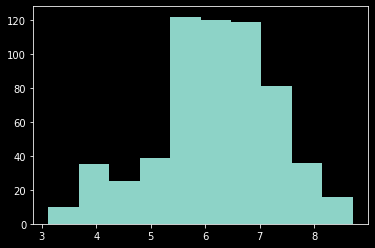

In [129]:
# unscaled data

plt.hist(pd.DataFrame(traits).iloc[:,1])
print("unscaled mean: ", np.mean(pd.DataFrame(traits).iloc[:,1]))
print("unscaled st_dev: ",np.std(pd.DataFrame(traits).iloc[:,1]))

scaled mean:  -7.070076972737315e-17
scaled st_dev:  1.0


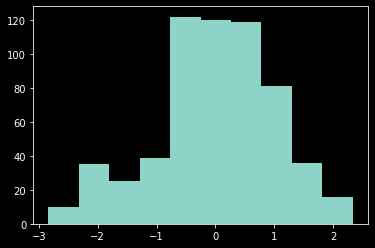

In [130]:
# scaled data

plt.hist(pd.DataFrame(traits_scaled).iloc[:,1])
print("scaled mean: ", np.mean(pd.DataFrame(traits_scaled).iloc[:,1]))
print("scaled st_dev: ",np.std(pd.DataFrame(traits_scaled).iloc[:,1]))

In [131]:
pca=PCA(n_components=4) # set up our PCA 
fit=pca.fit_transform(traits_scaled) # fit the PCA to our scaled measurements
scores = pd.DataFrame(data = fit, columns = ['pc1', 'pc2', 'pc3', 'pc4'])

scores

,pc1,pc2,pc3,pc4
0,3.115642,-0.082034,-0.233662,-0.339423
1,-0.486677,0.424178,-0.607547,0.229200
2,-0.121518,0.272429,-0.339566,0.484410
3,-0.063377,0.609771,-0.232341,0.785821
4,0.498541,0.624860,-0.089705,1.088710
...,...,...,...,...
598,0.571278,-1.579216,-0.739479,0.300642
599,-0.803169,0.066677,0.199074,0.397065
600,-0.898390,0.378259,-0.115940,0.091217
601,2.697347,-0.115673,0.002450,-0.464925


## how well does each principal component explain the overall dataset?

  - we can find out how much variation in the dataset is encompassed within each PC
  - the first principal component captures ~76% of the variation in the original dataset
    - suggests our dataset had a lot of redundancy

In [132]:
prop_var=pca.explained_variance_ratio_ * 100
prop_var

array([75.73441727, 10.7845884 ,  5.44746907,  4.58346775])

# we can make some other cool visualizations using these PCs

In [133]:
scores['order'] = list(panthdat_trans['order'])
scores.head()

,pc1,pc2,pc3,pc4,order
0,3.115642,-0.082034,-0.233662,-0.339423,Artiodactyla
1,-0.486677,0.424178,-0.607547,0.229200,Carnivora
2,-0.121518,0.272429,-0.339566,0.484410,Carnivora
3,-0.063377,0.609771,-0.232341,0.785821,Carnivora
4,0.498541,0.624860,-0.089705,1.088710,Carnivora


# PC plots
  - we can visualize 76%+11% = 87% of the variation in the original 5 measurements using only two axes


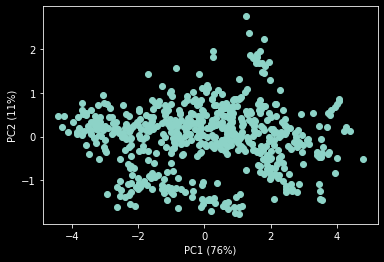

In [134]:
ax=plt.plot(scores.pc1, scores.pc2, marker='o', linestyle='')
plt.xlabel("PC1 ("+str(round(prop_var[0]))+"%)")
plt.ylabel("PC2 ("+str(round(prop_var[1]))+"%)")
plt.show()

# PC 'loadings'

- values pointing in the same direction are positively correlated
- values pointing in perpendicular directions are uncorrelated
- values pointing in opposite directions are negatively correlated

Text(0, 0.5, 'PC2 (11%)')

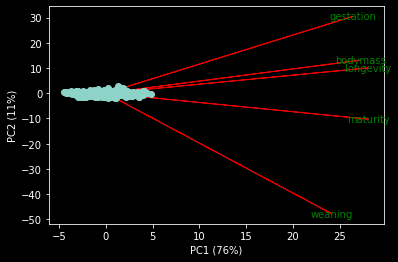

In [135]:
# this code is really complicated and scary-- treat it as magic.

ax=plt.plot(scores.pc1, scores.pc2, marker='o', linestyle='')
coeff = np.transpose(pca.components_[0:3,:])
n = coeff.shape[0]
for i in range(n):
    plt.arrow(0, 0, coeff[i,0]*60, coeff[i,1]*60,color = 'r',alpha = 0.9)
    plt.text(coeff[i,0]* 60, coeff[i,1] * 60, list(panthdat_trans.columns[2:])[i], color = 'g', ha = 'center', va = 'center')
plt.xlabel("PC1 ("+str(round(prop_var[0]))+"%)")
plt.ylabel("PC2 ("+str(round(prop_var[1]))+"%)")


# we can convince ourselves this is true

r-squared: 0.5143670148040211


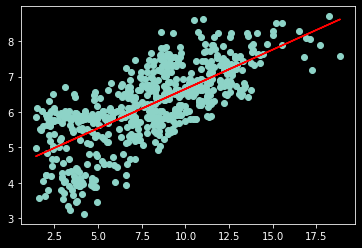

In [149]:
regmod = ols('maturity ~ bodymass', data = panthdat_trans) # setup the model
regmod_fit = regmod.fit() # estimate/fit the model 
print("r-squared:",regmod_fit.rsquared)
line = regmod_fit.fittedvalues
plt.plot( panthdat_trans['bodymass'], panthdat_trans['maturity'],marker="o",linestyle="")
plt.plot(panthdat_trans['bodymass'], line, color = "red")

# we can convince ourselves this is true

r-squared: 0.2524583433014067


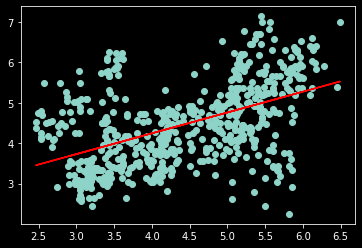

In [148]:
regmod = ols('weaning ~ gestation', data = panthdat_trans) # setup the model
regmod_fit = regmod.fit() # estimate/fit the model 
print("r-squared:",regmod_fit.rsquared)
line = regmod_fit.fittedvalues
plt.plot( panthdat_trans['gestation'], panthdat_trans['weaning'],marker="o",linestyle="")
plt.plot(panthdat_trans['gestation'], line, color = "red")

In [136]:
comp = pd.DataFrame({"bodymass":list(panthdat_trans["bodymass"]),"pc1":list(scores["pc1"]),"pc2":list(scores["pc2"]) })

# we can try to see what measurements our PCs describe the most

rsquared:  0.7795724506107472


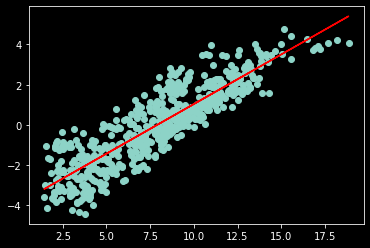

In [137]:
regmod = ols('pc1 ~ bodymass', data = comp)
regmod_fit = regmod.fit() 
print("rsquared: ",regmod_fit.rsquared)
line = regmod_fit.fittedvalues
plt.plot(comp['bodymass'], comp['pc1'],marker="o",linestyle="")
plt.plot(comp['bodymass'], line, color = "red")

# we can try to see what measurements our PCs describe the most

rsquared:  0.025778086828357694


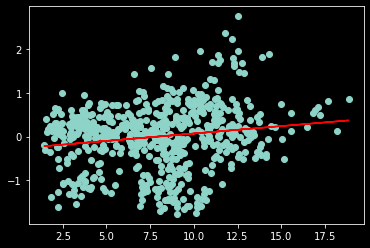

In [125]:
regmod = ols('pc2 ~ bodymass', data = comp)
regmod_fit = regmod.fit() 
print("rsquared: ",regmod_fit.rsquared)
line = regmod_fit.fittedvalues
plt.plot(comp['bodymass'], comp['pc2'],marker="o",linestyle="")
plt.plot(comp['bodymass'], line, color = "red")

# bodymass and longevity

rsquared:  0.5848589357672793


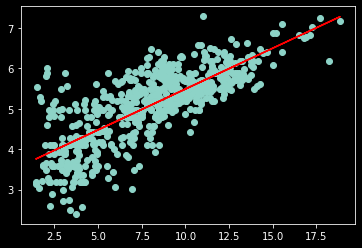

In [83]:
regmod = ols('longevity ~ bodymass', data = panthdat_trans)
regmod_fit = regmod.fit() 
print("rsquared: ",regmod_fit.rsquared)
line = regmod_fit.fittedvalues
plt.plot( panthdat_trans['bodymass'], panthdat_trans['longevity'],marker="o",linestyle="")
plt.plot(panthdat_trans['bodymass'], line, color = "red")

rsquared:  0.2524583433014068


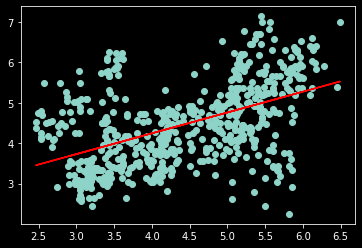

In [84]:
regmod = ols('weaning ~ gestation', data = panthdat_trans)
regmod_fit = regmod.fit() 
print("rsquared: ",regmod_fit.rsquared)
line = regmod_fit.fittedvalues
plt.plot( panthdat_trans['gestation'], panthdat_trans['weaning'],marker="o",linestyle="")
plt.plot(panthdat_trans['gestation'], line, color = "red")

# visualizing data between groups

- one area where PCA really comes in handy is in visualizing the distribution of multidimensional data between groupings 
- for example, we may want to know if certain orders are more similar or different from one another overall

In [98]:
sub_scores = scores.loc[(scores['order']=="Carnivora") | (scores['order']=="Primates") | (scores['order']=="Cetacea") | (scores['order']=="Rodentia")]

# visualizing data between groups

Text(0, 0.5, 'PC2 (11%)')

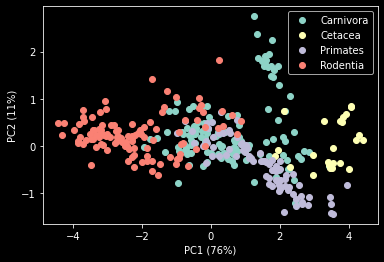

In [100]:
for name, group in sub_scores.groupby('order'):
    plt.plot(group.pc1, group.pc2, marker='o', linestyle='', label=name)
plt.legend()
plt.xlabel("PC1 ("+str(round(prop_var[0]))+"%)")
plt.ylabel("PC2 ("+str(round(prop_var[1]))+"%)")

# visualizing data between groups

Text(0, 0.5, 'PC2 (5%)')

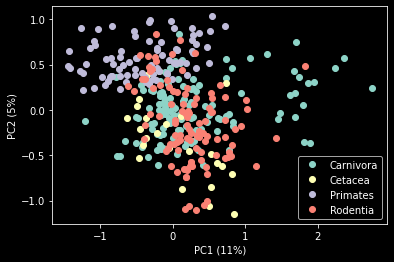

In [102]:
for name, group in sub_scores.groupby('order'):
    plt.plot(group.pc2, group.pc3, marker='o', linestyle='', label=name)
plt.legend()
plt.xlabel("PC1 ("+str(round(prop_var[1]))+"%)")
plt.ylabel("PC2 ("+str(round(prop_var[2]))+"%)")